# Project 1: Navigation

This project is a demonstration of [Deep Q-Learning](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html) as a policy in a model-free environment. For this project, we use a Unity environment consisting of a continuous state space of 37 dimensions. The goal is to collect yellow bananas and avoid the blue bananas. The rewards for each are +1 and -1 respectively. The actions that the agent can take are moving left, right, forward and backward.

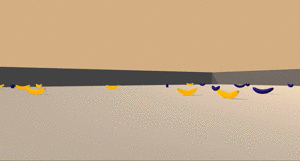

## Implementation
The core of the learning algorithm is Deep Q-Learning, which surpassed human level performance in Atari games. In DQN, the policy being evauated is different from the policy being learned. The main idea is to learn the action-value function, denoted as `Q(s,a)`, where `s` represents the current state and `a` represents the action being evaluated. Q-Learning is a form of Temporal-Difference learning (TD learning) where the agent learns from each step rather than waiting for the entire episode to complete, as in the case of [Monte-Carlo Methods](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=8&cad=rja&uact=8&ved=2ahUKEwimhduIxZnpAhW9H7cAHUgvAgwQFjAHegQIEhAF&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FMonte_Carlo_method&usg=AOvVaw0kuAFzqPLaQaJHI7yfMv-J). The idea is to use the current Q-value to estimate future rewards
<img src = "Images/Q-value.svg">
But since the space is continuous, we can't use a Q-table to calculate future rewards. Instead, we have to use function approximators. We introduce a $\theta$ parameter, thus replacing `Q(s,a)` with $\hat{Q}(s,a;\theta)$. Now we have a supervised learning problem where $\hat{Q}$ is the expected value and $R + \gamma*max(Q(s',a))$ is the target. And what better way to tackle a supervised learning problem than using **Deep Learning**? In this project, we use a 3-layer neural network with `relu` activation and `Adam` optimizer. However, some modifications are made on the algorithm, as the basic model is unstable and may not converge.

* Experience replay: If we keep learning from experiences as they come, it will skew the data and the exoeriences become highly correlated, destroying all independence between them. In ER we maintain a replay buffer of fixed size. We run a few episodes and store each experience in the buffer. After a fixed number of iterations we sample from this buffer and calculate loss. This way, the sequential nature of the experiences can be overcome and the experiences can be independant by anachronistically sampling them.

* Fixed Q-targets: Tbe target is dependant on $\theta$ (simply `w` in this case), the parameter being updated. This leads to constantly moving targets, making the whole point of learning meaningless. Fixed Q-targets means fixing `w` used in calculation of $\hat{Q}(s,a;w)$. This is achieved by having two separate networks, one being learned online and other being the target.

The entire implementation is done using PyTorch.

### Hyperparameters
The hyperparameters used are as follows:

* Batch Size: 64
* Replay buffer size: 100,000
* $\gamma$: 0.99
* $\tau$: 0.001
* Learning rate: 0.0005
* Epsilon start: 1.0
* Epsilon end: 0.1
* Epsilon decay: 0.995
* Timesteps per episode: 2000
* No. of episodes: 5000

## Results
The results are as follows:

| DQN | Double DQN |
| --- | --- |
| <img src = "dqn_scores.png"> | <img src = "ddqn_scores.png"> |

Double DQN solved the environment (reached the average score of +13) in 466 steps while DQN took 527 episodes to solve the environment.

## Possible Improvements

There is a huge room for improvement here. Some improvements can be done as:
* A Hyperparameter search for both networks
* Using [Prioritized Experience Replay](https://arxiv.org/abs/1511.05952) as it helped improve performance on Atari games
* Adding more layers to the neural networks, since deeper neural networks have more generalizing potential.